# Milestone 2 Assignment - Capstone Check-in

## Author - Studentname

### Capstone Project Instructions
Select a problem and data sets of particular interest and apply the analytics process to find and report on a solution.

Students will construct a simple dashboard to allow a non-technical user to explore their solution. The data should be read from a suitable persistent data storage, such as an Internet URL or a SQL data base.

The process followed by the students and the grading criteria include:
<ol style="list-style-type: lower-alpha;">
<li>Understand the business problem <span class="label" style="border-radius: 3px; background-color: darkcyan; color: white;">Milestone 1</span></li>
<li>Evaluate and explore the available data <span class="label" style="border-radius: 3px; background-color: darkcyan; color: white;">Milestone 1</span></li>
<li>Proper data preparation <span class="label" style="border-radius: 3px; background-color: darkcyan; color: white;">Milestone 1</span> <span class="label" style="border-radius: 3px; background-color: royalblue; color: white;">Milestone 2</span></li>
<li>Exploration of data and understand relationships <span class="label" style="border-radius: 3px; background-color: darkcyan; color: white;">Milestone 1</span> <span class="label" style="border-radius: 3px; background-color: royalblue; color: white;">Milestone 2</span></li>
<li>Perform basic analytics and machine learning, within the scope of the course, on the data.  <span class="label" style="border-radius: 3px; background-color: royalblue; color: white;">Milestone 2</span> <span class="label" style="border-radius: 3px; background-color: slateblue; color: white;">Milestone 3</span> <BR/>For example, classification to predict which employees are most likely to leave the company.</li>
<li>Create a written and/or oral report on the results suitable for a non-technical audience. <span class="label" style="border-radius: 3px; background-color: slateblue; color: white;">Milestone 3</span></li>
</ol>



## Tasks
<img src="https://library.startlearninglabs.uw.edu/DATASCI420/img/Milestone2Sample.PNG" style="float: right; width: 400px;">
For this check-in, you are to:

1). Explicitly state the problem, list sources, and define the methodology: classification, regression, other

2). List data processing steps (psuedo code) including steps from data source collection & preparation, feature engineering & selection, modeling, performance evaluation.

3). Read in the previously generated data file of cleaned up data

4). Perform feature engineering and selection

5). Conduct some preliminary modeling 

6). Identify potential machine learning model(s) to improve performance


## Project Goal



The goal of this project is to predict results of presidental elections: who will win - Republicans or Democrats.

## Methodology 

It's definitely classification problem, actually even binomial classification. So, Decision Tree, Random Forest or Naive Bayes classifiers could perform well.

## Data sources

For this project are used three datasets, that were prepared by members of our team.
* political_data.csv - main dataset, that contains election statistics and election results;
* state_edu_spending.csv - statistics about expenses for education;
* socio_data.csv - unemployment data, average income and poverty data.

All datasets contain columns "year" and "state", and their combination is used as a key for joining datasets.


## Data Processing Steps

1. Data source collection and preparation.

  1.1 Load datasets
  
  1.2 Join datasets
  
  1.3 Drop rows with missing values
  
  1.4 Add target variable "winner"
  
  1.5 Encode categorical data
  
  1.6 Scale data
  
  
2. Feature selection

    2.1 Backword elimination
    
    2.2 K-best
    
    2.3 Lasso selection
    
    
3. Preliminary modeling

    3.1 Decision tree classifier
    
    3.2 Random forest classification
    
    3.3 Naive Bayes classification
    
    
4. Analysis results

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import re
import pandas_profiling
from sklearn import preprocessing
from sklearn import cross_validation
from sklearn import grid_search
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from pandas_ml import ConfusionMatrix
from sklearn.metrics import roc_auc_score
from sklearn import tree
import category_encoders as ce
import os
from IPython.display import Image
import matplotlib.pyplot as plt

C:\Users\zubov\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\zubov\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
#Load political data
political_df = pd.read_csv("political_data.csv")

In [3]:
political_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 535 entries, 0 to 534
Data columns (total 28 columns):
Unnamed: 0     535 non-null int64
year           535 non-null int64
state          535 non-null object
ev_r           535 non-null int64
ev_d           535 non-null int64
population     535 non-null float64
total_vap      535 non-null float64
total_reg      535 non-null float64
total_vote     535 non-null int64
perc_vap       535 non-null float64
perc_reg       535 non-null float64
d_placed       535 non-null int64
r_placed       535 non-null int64
perc_margin    535 non-null float64
vote_perc_d    535 non-null float64
vote_perc_r    535 non-null float64
vote_perc_t    535 non-null float64
vote_perc_o    535 non-null float64
electoral      535 non-null object
governor       535 non-null object
con_house_d    535 non-null int64
con_house_r    535 non-null int64
con_sen_d      535 non-null int64
con_sen_r      535 non-null int64
leg_house_d    535 non-null int64
leg_house_r    535 non

In [560]:
political_df.head()

,Unnamed: 0,year,state,ev_r,ev_d,population,total_vap,total_reg,total_vote,perc_vap,...,electoral,governor,con_house_d,con_house_r,con_sen_d,con_sen_r,leg_house_d,leg_house_r,leg_sen_d,leg_sen_r
0,0,2016,arizona,11,0,6931071.0,2.650448e+06,4088036.0,2604657,47.136364,...,R,R,4,5,0,2,24,36,12,18
1,1,2016,arkansas,6,0,2988248.0,1.716395e+06,1759982.0,1130635,50.254545,...,R,R,0,4,0,2,35,64,11,24
2,2,2016,california,0,55,39250017.0,2.020329e+07,19411771.0,14237893,50.263636,...,D,D,39,14,2,0,52,28,26,14
3,3,2016,colorado,0,9,5540545.0,2.483406e+06,3840159.0,2780247,58.781818,...,D,D,3,4,1,1,34,31,17,18
4,4,2016,connecticut,0,7,3576452.0,2.381272e+06,2357733.0,1644920,61.490909,...,D,D,5,0,2,0,87,64,21,15


In [579]:
#Change state value for matching with other datasets
political_df.loc[political_df['state']=='d.c.', 'state'] = 'district of columbia'

In [580]:
#Load education data
education_df = pd.read_csv("state_edu_spending.csv")

In [563]:
education_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 7 columns):
year                   946 non-null int64
state                  946 non-null object
total_revenue          946 non-null float64
instruction_expense    946 non-null float64
property_expense       946 non-null float64
total_edu_expense      946 non-null float64
per_pupil_expense      946 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 51.8+ KB


In [32]:
education_df.head()

,year,state,total_revenue,instruction_expense,property_expense,total_edu_expense,per_pupil_expense
0,2000,alabama,6.734880e+09,3.592552e+09,2.249278e+08,6.879115e+09,7314.254756
1,2000,alaska,1.895197e+09,9.239744e+08,7.237520e+07,1.916757e+09,12751.127960
2,2000,arizona,7.670325e+09,3.631073e+09,6.984060e+08,7.788936e+09,7102.916696
3,2000,arkansas,3.805996e+09,2.017782e+09,1.342974e+08,3.663107e+09,7403.965385
4,2000,california,6.282874e+10,3.321765e+10,2.263272e+09,6.196632e+10,8563.135731


In [581]:
#Transform 'state' values to low register
education_df['state'] = education_df['state'].str.lower()

In [582]:
#Load socioeconomic data
socio_df = pd.read_csv("socio_data.csv")

In [567]:
socio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2184 entries, 0 to 2183
Data columns (total 18 columns):
Unnamed: 0                                         2184 non-null int64
state                                              2184 non-null object
year                                               2184 non-null int64
labor force                                        2184 non-null int64
unemployment rate                                  2184 non-null float64
All Ages SAIPE Poverty Universe                    2142 non-null float64
All Ages in Poverty Count                          2142 non-null float64
All Ages in Poverty Percent                        2142 non-null float64
Under Age 18 SAIPE Poverty Universe                2142 non-null float64
Under Age 18 in Poverty Count                      2142 non-null float64
Under Age 18 in Poverty Percent                    2142 non-null float64
Ages 5 to 17 in Families SAIPE Poverty Universe    2142 non-null float64
Ages 5 to 17 in Families

In [568]:
socio_df.head()

,Unnamed: 0,state,year,labor force,unemployment rate,All Ages SAIPE Poverty Universe,All Ages in Poverty Count,All Ages in Poverty Percent,Under Age 18 SAIPE Poverty Universe,Under Age 18 in Poverty Count,Under Age 18 in Poverty Percent,Ages 5 to 17 in Families SAIPE Poverty Universe,Ages 5 to 17 in Families in Poverty Count,Ages 5 to 17 in Families in Poverty Percent,Under Age 5 SAIPE Poverty Universe,Under Age 5 in Poverty Count,Under Age 5 in Poverty Percent,Median Household Income in Dollars
0,0,Alabama,1976,1501284,6.8,4524161.0,749749.5,17.2,1097007.0,267674.0,24.625,797580.5,178183.0,22.7,294729.5,82291.0,27.7,36131.0
1,1,Alabama,1977,1568504,7.3,4524161.0,749749.5,17.2,1097007.0,267674.0,24.625,797580.5,178183.0,22.7,294729.5,82291.0,27.7,36131.0
2,2,Alabama,1978,1621710,6.4,4524161.0,749749.5,17.2,1097007.0,267674.0,24.625,797580.5,178183.0,22.7,294729.5,82291.0,27.7,36131.0
3,3,Alabama,1979,1656358,7.2,4524161.0,749749.5,17.2,1097007.0,267674.0,24.625,797580.5,178183.0,22.7,294729.5,82291.0,27.7,36131.0
4,4,Alabama,1980,1669289,8.9,4524161.0,749749.5,17.2,1097007.0,267674.0,24.625,797580.5,178183.0,22.7,294729.5,82291.0,27.7,36131.0


In [583]:
#Transform 'state' values to low register
socio_df['state'] = socio_df['state'].str.lower()

In [584]:
#Join datasets 
politic_socio = pd.merge(political_df, socio_df, how='left', on=['state', 'year'])
politic_socio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 535 entries, 0 to 534
Data columns (total 44 columns):
Unnamed: 0_x                                       535 non-null int64
year                                               535 non-null int64
state                                              535 non-null object
ev_r                                               535 non-null int64
ev_d                                               535 non-null int64
population                                         535 non-null float64
total_vap                                          535 non-null float64
total_reg                                          535 non-null float64
total_vote                                         535 non-null int64
perc_vap                                           535 non-null float64
perc_reg                                           535 non-null float64
d_placed                                           535 non-null int64
r_placed                                    

In [585]:
#Join datasets 
data_df = pd.merge(politic_socio, education_df, how='left', on=['state', 'year'])
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 535 entries, 0 to 534
Data columns (total 49 columns):
Unnamed: 0_x                                       535 non-null int64
year                                               535 non-null int64
state                                              535 non-null object
ev_r                                               535 non-null int64
ev_d                                               535 non-null int64
population                                         535 non-null float64
total_vap                                          535 non-null float64
total_reg                                          535 non-null float64
total_vote                                         535 non-null int64
perc_vap                                           535 non-null float64
perc_reg                                           535 non-null float64
d_placed                                           535 non-null int64
r_placed                                    

In [586]:
#Drop rows with null values
df = data_df.dropna()

In [587]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 281 entries, 0 to 280
Data columns (total 49 columns):
Unnamed: 0_x                                       281 non-null int64
year                                               281 non-null int64
state                                              281 non-null object
ev_r                                               281 non-null int64
ev_d                                               281 non-null int64
population                                         281 non-null float64
total_vap                                          281 non-null float64
total_reg                                          281 non-null float64
total_vote                                         281 non-null int64
perc_vap                                           281 non-null float64
perc_reg                                           281 non-null float64
d_placed                                           281 non-null int64
r_placed                                    

In [588]:
df['governor'].value_counts()

R                        147
D                        124
E                          5
Mark Dayton (DFL)          2
I                          2
Jesse Ventura (Ref/I)      1
Name: governor, dtype: int64

In [589]:
#Delete outliers  from column 'electoral'
df = df.loc[df['electoral'].isin(['R', 'D', 'E']), :]

In [590]:
#Delete outliers  from column 'governor'
df = df.loc[df['governor'].isin(['R', 'D', 'E']), :]

In [591]:
df.isnull().sum()

Unnamed: 0_x                                       0
year                                               0
state                                              0
ev_r                                               0
ev_d                                               0
population                                         0
total_vap                                          0
total_reg                                          0
total_vote                                         0
perc_vap                                           0
perc_reg                                           0
d_placed                                           0
r_placed                                           0
perc_margin                                        0
vote_perc_d                                        0
vote_perc_r                                        0
vote_perc_t                                        0
vote_perc_o                                        0
electoral                                     

#### Data normalization ####

In [592]:
#Perform z-score normalization of Rentals column and save result into new column "Rentals Scaled"
columns = ['Unnamed: 0_x', 'ev_r', 'ev_d', 'population',
       'total_vap', 'total_reg', 'total_vote', 'perc_vap', 'perc_reg',
       'd_placed', 'r_placed', 'perc_margin', 'vote_perc_d', 'vote_perc_r',
       'vote_perc_t', 'vote_perc_o', 'con_house_d',
       'con_house_r', 'con_sen_d', 'con_sen_r', 'leg_house_d', 'leg_house_r',
       'leg_sen_d', 'leg_sen_r', 'Unnamed: 0_y', 'labor force',
       'unemployment rate', 'All Ages SAIPE Poverty Universe',
       'All Ages in Poverty Count', 'All Ages in Poverty Percent',
       'Under Age 18 SAIPE Poverty Universe', 'Under Age 18 in Poverty Count',
       'Under Age 18 in Poverty Percent',
       'Ages 5 to 17 in Families SAIPE Poverty Universe',
       'Ages 5 to 17 in Families in Poverty Count',
       'Ages 5 to 17 in Families in Poverty Percent',
       'Under Age 5 SAIPE Poverty Universe', 'Under Age 5 in Poverty Count',
       'Under Age 5 in Poverty Percent', 'Median Household Income in Dollars',
       'total_revenue', 'instruction_expense', 'property_expense',
       'total_edu_expense', 'per_pupil_expense']

for column in columns:
    df[column] = pd.DataFrame(preprocessing.scale(df[column]))


C:\Users\zubov\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\zubov\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\zubov\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\zubov\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\zubov\AppData\Local

In [593]:
df.isnull().sum()

Unnamed: 0_x                                       10
year                                                0
state                                               0
ev_r                                               10
ev_d                                               10
population                                         10
total_vap                                          10
total_reg                                          10
total_vote                                         10
perc_vap                                           10
perc_reg                                           10
d_placed                                           10
r_placed                                           10
perc_margin                                        10
vote_perc_d                                        10
vote_perc_r                                        10
vote_perc_t                                        10
vote_perc_o                                        10
electoral                   

In [594]:
df = df.dropna()

In [598]:
#Add target variable - winner. 1 for Republican and 0 for Democrat
df.loc[df['ev_r'] >= df['ev_d'], 'winner'] = 1
df.loc[df['ev_r'] < df['ev_d'], 'winner'] = 0

#### Encoding categorical variables with risk values ####

In [608]:
df['year'] = df['year'].astype(str)

In [609]:
#Getting risk values
General_Prob = (df['winner'] == 1 ).sum()/float(df.shape[0])
variable_risks = {}
for variable in ['state', 'year', 'electoral', 'governor']:
    tab = pd.crosstab(df[variable], df.winner)
    print(tab)
    num_levels = tab.shape[0]
    level_risk = {}
    levels = list(tab.index)
    level_index = 0
    for lev in levels:
        if lev == True:
            lev = 'True'
        elif lev == False:
            lev = 'False'
        level_risk[lev] = np.log((tab.iloc[level_index, 1] + General_Prob) / (tab.iloc[level_index, 0] + 1 - General_Prob))
        level_index += 1
    variable_risks[variable] = level_risk

# list the risks associated with the variables
variable_risks

winner                0.0  1.0
state                         
alabama                 5    0
alaska                  4    0
arizona                 3    2
arkansas                0    4
california              5    2
colorado                2    3
connecticut             5    1
delaware                2    3
district of columbia    3    2
florida                 1    4
georgia                 1    5
hawaii                  1    4
idaho                   2    3
illinois                3    3
indiana                 3    2
iowa                    3    2
kansas                  4    2
kentucky                2    4
louisiana               3    6
maine                   1    2
maryland                1    6
massachusetts           2    3
michigan                4    1
minnesota               3    0
mississippi             3    3
missouri                3    3
montana                 3    2
nebraska                2    2
nevada                  2    3
new hampshire           4    1
new jers

{'state': {'alabama': -2.320986178364937,
  'alaska': -2.1188339433904968,
  'arizona': -0.31156380445516818,
  'arkansas': 2.28086326984721,
  'california': -0.76736304503723296,
  'colorado': 0.36148451026523287,
  'connecticut': -1.268667173667672,
  'delaware': 0.36148451026523287,
  'district of columbia': -0.31156380445516818,
  'florida': 1.1312332068373758,
  'georgia': 1.3304439919399575,
  'hawaii': 1.1312332068373758,
  'idaho': 0.36148451026523287,
  'illinois': 0.020799874110675774,
  'indiana': -0.31156380445516818,
  'iowa': -0.31156380445516818,
  'kansas': -0.56521081006279272,
  'kentucky': 0.61050909120633168,
  'louisiana': 0.635077367659448,
  'maine': 0.5498449473304331,
  'maryland': 1.4964861194450494,
  'massachusetts': 0.36148451026523287,
  'michigan': -1.0665149386932318,
  'minnesota': -1.8651869377828723,
  'mississippi': 0.020799874110675774,
  'missouri': 0.020799874110675774,
  'montana': -0.31156380445516818,
  'nebraska': 0.029120831699388817,
  'neva

In [429]:
df.head()

,Unnamed: 0_x,year,state,ev_r,ev_d,population,total_vap,total_reg,total_vote,perc_vap,...,Under Age 5 SAIPE Poverty Universe,Under Age 5 in Poverty Count,Under Age 5 in Poverty Percent,Median Household Income in Dollars,total_revenue,instruction_expense,property_expense,total_edu_expense,per_pupil_expense,winner
0,-1.757904,2016,arizona,0.886903,-0.584485,0.067409,-0.361843,0.050529,-0.012567,-1.333180,...,0.009550,0.138340,0.696814,0.440482,-0.216631,-0.288078,0.082504,-0.230858,-1.150134,1.0
1,-1.745491,2016,arkansas,0.161206,-0.584485,-0.485741,-0.560724,-0.578138,-0.577592,-0.897239,...,-0.489739,-0.364067,1.118520,-0.498222,-0.496438,-0.510012,-0.280305,-0.489524,-0.450578,1.0
2,-1.733079,2016,california,-0.709630,4.445397,4.601529,3.375564,4.188546,4.446708,-0.895969,...,4.104137,3.657703,-0.041172,1.912824,3.715566,3.571455,0.972992,3.734067,0.066361,0.0
3,-1.720666,2016,colorado,-0.709630,0.238586,-0.127672,-0.397410,-0.016407,0.054741,0.294923,...,-0.189800,-0.401697,-1.236007,1.706258,-0.258831,-0.304894,-0.220166,-0.289627,-0.535439,0.0
4,-1.708254,2016,connecticut,-0.709630,0.055681,-0.403220,-0.419157,-0.416721,-0.380455,0.673670,...,-0.497415,-0.568487,-1.007583,2.498803,-0.149168,-0.091707,-0.344149,-0.147125,2.404679,0.0


In [610]:
#Reset index
df = df.reset_index(drop=True)

In [611]:
#Replace categorical variables with risk values
df_risks = df.copy()
num_obs = df.shape[0]
for variable in ['state', 'year', 'electoral', 'governor']:
    for i in range(num_obs):
        if df[variable][i] == True:
            lev = 'True'
        elif df[variable][i] == False:
            lev = 'False'
        else:
            lev = df[variable][i]
        df_risks[variable][i] = variable_risks[variable][lev]
df_risks.head()

C:\Users\zubov\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


,Unnamed: 0_x,year,state,ev_r,ev_d,population,total_vap,total_reg,total_vote,perc_vap,...,Under Age 5 SAIPE Poverty Universe,Under Age 5 in Poverty Count,Under Age 5 in Poverty Percent,Median Household Income in Dollars,total_revenue,instruction_expense,property_expense,total_edu_expense,per_pupil_expense,winner
0,-1.757904,0.399707,-0.311564,0.886903,-0.584485,0.067409,-0.361843,0.050529,-0.012567,-1.333180,...,0.009550,0.138340,0.696814,0.440482,-0.216631,-0.288078,0.082504,-0.230858,-1.150134,1.0
1,-1.745491,0.399707,2.28086,0.161206,-0.584485,-0.485741,-0.560724,-0.578138,-0.577592,-0.897239,...,-0.489739,-0.364067,1.118520,-0.498222,-0.496438,-0.510012,-0.280305,-0.489524,-0.450578,1.0
2,-1.733079,0.399707,-0.767363,-0.709630,4.445397,4.601529,3.375564,4.188546,4.446708,-0.895969,...,4.104137,3.657703,-0.041172,1.912824,3.715566,3.571455,0.972992,3.734067,0.066361,0.0
3,-1.720666,0.399707,0.361485,-0.709630,0.238586,-0.127672,-0.397410,-0.016407,0.054741,0.294923,...,-0.189800,-0.401697,-1.236007,1.706258,-0.258831,-0.304894,-0.220166,-0.289627,-0.535439,0.0
4,-1.708254,0.399707,-1.26867,-0.709630,0.055681,-0.403220,-0.419157,-0.416721,-0.380455,0.673670,...,-0.497415,-0.568487,-1.007583,2.498803,-0.149168,-0.091707,-0.344149,-0.147125,2.404679,0.0


In [288]:
#Perform OneHot-encoding for categorical variables
### import category_encoders as ce
cat_columns = ['state', 'year', 'electoral', 'governor']
#le =  ce.OneHotEncoder(cols = cat_columns)
#df_encoded = le.fit_transform(df)
#df_encoded.head()
df_encoded = pd.get_dummies(df, columns=cat_columns, prefix=['state', 'year', 'electoral', 'governor'])

In [612]:
df.isnull().sum()

Unnamed: 0_x                                       0
year                                               0
state                                              0
ev_r                                               0
ev_d                                               0
population                                         0
total_vap                                          0
total_reg                                          0
total_vote                                         0
perc_vap                                           0
perc_reg                                           0
d_placed                                           0
r_placed                                           0
perc_margin                                        0
vote_perc_d                                        0
vote_perc_r                                        0
vote_perc_t                                        0
vote_perc_o                                        0
electoral                                     

In [616]:
df_risks.columns

Index(['Unnamed: 0_x', 'year', 'state', 'ev_r', 'ev_d', 'population',
       'total_vap', 'total_reg', 'total_vote', 'perc_vap', 'perc_reg',
       'd_placed', 'r_placed', 'perc_margin', 'vote_perc_d', 'vote_perc_r',
       'vote_perc_t', 'vote_perc_o', 'electoral', 'governor', 'con_house_d',
       'con_house_r', 'con_sen_d', 'con_sen_r', 'leg_house_d', 'leg_house_r',
       'leg_sen_d', 'leg_sen_r', 'Unnamed: 0_y', 'labor force',
       'unemployment rate', 'All Ages SAIPE Poverty Universe',
       'All Ages in Poverty Count', 'All Ages in Poverty Percent',
       'Under Age 18 SAIPE Poverty Universe', 'Under Age 18 in Poverty Count',
       'Under Age 18 in Poverty Percent',
       'Ages 5 to 17 in Families SAIPE Poverty Universe',
       'Ages 5 to 17 in Families in Poverty Count',
       'Ages 5 to 17 in Families in Poverty Percent',
       'Under Age 5 SAIPE Poverty Universe', 'Under Age 5 in Poverty Count',
       'Under Age 5 in Poverty Percent', 'Median Household Income in Dol

In [614]:
#Dataset profile that also provides correlation matrix
pandas_profiling.ProfileReport(df_risks)

Number of variables,50
Number of observations,261
Total Missing (%),0.0%
Total size in memory,102.0 KiB
Average record size in memory,400.3 B
Numeric,28
Categorical,0
Boolean,2
Date,0
Text (Unique),0
Rejected,20


In [ ]:
columns_not_rejected = ['Unnamed: 0_x', 'year', 'state', 'ev_r', 'ev_d', 'population',
       'total_vote', 'perc_vap', 'perc_reg',
       'd_placed', 'r_placed', 'perc_margin', 'vote_perc_d', 'vote_perc_r',
       'vote_perc_t', 'vote_perc_o', 'electoral', 'governor', 
       'con_house_r', 'con_sen_d', 'con_sen_r', 'leg_house_d', 'leg_house_r',
       'leg_sen_d', 'leg_sen_r', 'Unnamed: 0_y',
       'unemployment rate',
       'All Ages in Poverty Count', 'Under Age 18 in Poverty Count',
       'Ages 5 to 17 in Families in Poverty Count',
       'Under Age 5 SAIPE Poverty Universe', 'Median Household Income in Dollars',
       'total_revenue', 'instruction_expense', 'property_expense',
       'per_pupil_expense']

In [620]:
#Split dataset into features (X) and target variable (Y)
#X = df_risks.iloc[:, 0:-1]
X = df_risks.loc[:, columns_not_rejected]
Y = df_risks.iloc[:,-1]

#### Mutual information ####

In [623]:
# Calculate Mutual Information
from sklearn.metrics import mutual_info_score
for column in X.columns:
    mi = mutual_info_score(X[column], Y) 
    print(column, ': mutual information = ', mi)

Unnamed: 0_x : mutual information =  0.690495138424
year : mutual information =  0.0112152788808
state : mutual information =  0.164405662634
ev_r : mutual information =  0.690495138424
ev_d : mutual information =  0.690495138424
population : mutual information =  0.690495138424
total_vote : mutual information =  0.690495138424
perc_vap : mutual information =  0.59121288458
perc_reg : mutual information =  0.459017815635
d_placed : mutual information =  0.690495138424
r_placed : mutual information =  0.690495138424
perc_margin : mutual information =  0.669249247832
vote_perc_d : mutual information =  0.690495138424
vote_perc_r : mutual information =  0.690495138424
vote_perc_t : mutual information =  0.236375430062
vote_perc_o : mutual information =  0.506759754926
electoral : mutual information =  0.000106850223352
governor : mutual information =  0.00355201994859
con_house_r : mutual information =  0.138519951423
con_sen_d : mutual information =  0.180077717002
con_sen_r : mutual inf

In [448]:
X.isnull().sum()

Unnamed: 0_x                                       0
year                                               0
state                                              0
ev_r                                               0
ev_d                                               0
population                                         0
total_vap                                          0
total_reg                                          0
total_vote                                         0
perc_vap                                           0
perc_reg                                           0
d_placed                                           0
r_placed                                           0
perc_margin                                        0
vote_perc_d                                        0
vote_perc_r                                        0
vote_perc_t                                        0
vote_perc_o                                        0
electoral                                     

#### Recursive feature elimination ####

In [626]:
# Recursive Feature Elimination
from sklearn.feature_selection import RFE #Recursive Feature Elimination
from sklearn.linear_model import LinearRegression

estimator = LinearRegression()
selector = RFE(estimator, 10, step=1) # keep five and remove variables one at a time (step) 
selector = selector.fit(X, Y)        # fit the model with the five kept features
print(selector.support_)             # show which are kept (True) and which are removed (False)
print(selector.ranking_)             # show in what order they were removed highest removed first
print(X.columns)

f = open("features.csv",'w')
f.writelines("%s\n" % column for column in X.columns)
f.close()


[False False False False False False False False False  True  True False
  True  True  True  True False False False False False False False False
 False False False  True  True  True  True False False False False False]
[20 13 22 10  3  2  5 15 14  1  1 19  1  1  1  1  4  7 12 11 21 17 18 26  6
  8 25  1  1  1  1 27 24 23 16  9]
Index(['Unnamed: 0_x', 'year', 'state', 'ev_r', 'ev_d', 'population',
       'total_vote', 'perc_vap', 'perc_reg', 'd_placed', 'r_placed',
       'perc_margin', 'vote_perc_d', 'vote_perc_r', 'vote_perc_t',
       'vote_perc_o', 'electoral', 'governor', 'con_house_r', 'con_sen_d',
       'con_sen_r', 'leg_house_d', 'leg_house_r', 'leg_sen_d', 'leg_sen_r',
       'Unnamed: 0_y', 'unemployment rate', 'All Ages in Poverty Count',
       'Under Age 18 in Poverty Count',
       'Ages 5 to 17 in Families in Poverty Count',
       'Under Age 5 SAIPE Poverty Universe',
       'Median Household Income in Dollars', 'total_revenue',
       'instruction_expense', 'property_

In [627]:
rfe_columns = ['d_placed', 'r_placed', 'vote_perc_d', 'vote_perc_r','vote_perc_t', 'vote_perc_o', 
               'All Ages in Poverty Count', 'Under Age 18 in Poverty Count', 'Ages 5 to 17 in Families in Poverty Count', 'Under Age 5 SAIPE Poverty Universe']

In [629]:
# Forward Stepwise Feature Selection
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

lr = LinearRegression()

sfs = SFS(lr, 
          k_features= 10,
          forward=True, 
          floating=False, 
          scoring='neg_mean_squared_error',
          cv=10)

sfs = sfs.fit(X, Y)
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')
sfs.subsets_
#plt.title('Sequential Forward Selection (w. StdErr)')
#plt.grid()
#plt.show()

{1: {'feature_idx': (9,),
  'cv_scores': array([ -4.93038066e-32,  -0.00000000e+00,  -6.16297582e-33,
          -1.28948417e-31,  -1.10933565e-31,  -1.23259516e-32,
          -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00,
          -4.93038066e-32]),
  'avg_score': -3.5697852261503718e-32,
  'feature_names': ('d_placed',)},
 2: {'feature_idx': (9, 32),
  'cv_scores': array([ -7.21296430e-32,  -1.94370776e-32,  -4.26667557e-33,
          -0.00000000e+00,  -1.42222519e-33,  -9.95557633e-33,
          -3.41334046e-32,  -1.94370776e-32,  -0.00000000e+00,
          -3.79260051e-33]),
  'avg_score': -1.6457428028482336e-32,
  'feature_names': ('d_placed', 'total_revenue')},
 3: {'feature_idx': (9, 10, 32),
  'cv_scores': array([ -1.59780855e-32,  -5.68890076e-33,  -2.27556030e-32,
          -2.70222786e-32,  -2.41778282e-32,  -0.00000000e+00,
          -1.18518766e-32,  -1.51704020e-32,  -2.37037532e-33,
          -8.53335114e-33]),
  'avg_score': -1.3354870114652366e-32,
  'feature_na

In [648]:
#sfs_columns10 = ['population','d_placed','r_placed','leg_sen_d','leg_sen_r','All Ages in Poverty Count',
               #'Under Age 5 in Poverty Count','total_revenue','total_edu_expense','per_pupil_expense']
sfs_columns = ['year',
   'd_placed',
   'r_placed',
   'vote_perc_d',
   'vote_perc_r',
   'vote_perc_t',
   'Unnamed: 0_y',
   'total_revenue',
   'property_expense',
   'per_pupil_expense']    
    

In [631]:
# LASSO
from sklearn import linear_model

alpha = .1 # Increasing alpha can shrink more variable coefficients to 0
clf = linear_model.Lasso(alpha=alpha)
clf.fit(X, Y)

print(X.columns)
print(clf.coef_)
print(clf.intercept_)
print("Sum of ABS of coefficients = %.2f"%np.sum(clf.coef_**2)) 

Index(['Unnamed: 0_x', 'year', 'state', 'ev_r', 'ev_d', 'population',
       'total_vote', 'perc_vap', 'perc_reg', 'd_placed', 'r_placed',
       'perc_margin', 'vote_perc_d', 'vote_perc_r', 'vote_perc_t',
       'vote_perc_o', 'electoral', 'governor', 'con_house_r', 'con_sen_d',
       'con_sen_r', 'leg_house_d', 'leg_house_r', 'leg_sen_d', 'leg_sen_r',
       'Unnamed: 0_y', 'unemployment rate', 'All Ages in Poverty Count',
       'Under Age 18 in Poverty Count',
       'Ages 5 to 17 in Families in Poverty Count',
       'Under Age 5 SAIPE Poverty Universe',
       'Median Household Income in Dollars', 'total_revenue',
       'instruction_expense', 'property_expense', 'per_pupil_expense'],
      dtype='object')
[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -0.00000000e+00  -0.00000000e+00
  -0.00000000e+00   3.98878094e-01  -2.31720183e-16   0.00000000e+00
  -0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
 

In [632]:
#K-best
# Perform feature selection
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(f_classif, k=10)
selector.fit(X, Y)
selector.get_support()

array([False, False,  True,  True,  True, False, False, False, False,
       False, False, False,  True,  True, False, False, False, False,
       False,  True,  True, False, False,  True, False, False, False,
       False, False, False, False,  True, False, False, False,  True], dtype=bool)

In [644]:
kbest_columns = ['state','ev_r', 'ev_d', 'vote_perc_d', 'vote_perc_r', 'con_sen_d', 'con_sen_r', 'leg_sen_d', 
                 'Median Household Income in Dollars', 'per_pupil_expense']

In [634]:
X.columns

Index(['Unnamed: 0_x', 'year', 'state', 'ev_r', 'ev_d', 'population',
       'total_vote', 'perc_vap', 'perc_reg', 'd_placed', 'r_placed',
       'perc_margin', 'vote_perc_d', 'vote_perc_r', 'vote_perc_t',
       'vote_perc_o', 'electoral', 'governor', 'con_house_r', 'con_sen_d',
       'con_sen_r', 'leg_house_d', 'leg_house_r', 'leg_sen_d', 'leg_sen_r',
       'Unnamed: 0_y', 'unemployment rate', 'All Ages in Poverty Count',
       'Under Age 18 in Poverty Count',
       'Ages 5 to 17 in Families in Poverty Count',
       'Under Age 5 SAIPE Poverty Universe',
       'Median Household Income in Dollars', 'total_revenue',
       'instruction_expense', 'property_expense', 'per_pupil_expense'],
      dtype='object')

In [737]:
intuitive_columns = ['state','total_vote', 'population', 'unemployment rate', 
                     'All Ages in Poverty Count', 'Median Household Income in Dollars', 'instruction_expense','property_expense',
                     'per_pupil_expense']


## Preliminary Data Model



### Preparation train and test sets

#### With features getting SFS-method

In [649]:
X_sfs = X[sfs_columns]

In [651]:
X_sfs_train, X_sfs_test, y_sfs_train, y_sfs_test = train_test_split(X_sfs, Y, test_size = 0.1, random_state=1)

#### With features getting RFE-method

In [646]:
X_rfe = X[rfe_columns]

In [660]:
X_rfe_train, X_rfe_test, y_rfe_train, y_rfe_test = train_test_split(X_rfe, Y, test_size = 0.1, random_state=1)

#### With features getting KBest-method

In [645]:
X_kbest = X[kbest_columns]

In [652]:
X_kbest_train, X_kbest_test, y_kbest_train, y_kbest_test = train_test_split(X_kbest, Y, test_size = 0.1, random_state=1)

#### With features chosen intuitevely

In [738]:
X_int = X[intuitive_columns]

In [739]:
X_int_train, X_int_test, y_int_train, y_int_test = train_test_split(X_int, Y, test_size = 0.1, random_state=1)

### Decision tree classifier ###

In [682]:
np.random.seed(101)

In [740]:
#Classifiers initialization
clf_sfs = DecisionTreeClassifier(random_state = 0)
clf_rfe = DecisionTreeClassifier(random_state = 0)
clf_kbest = DecisionTreeClassifier(random_state = 0)
clf_int = DecisionTreeClassifier(random_state = 0)

In [656]:
#Get possible parameters for Decision Tree Classifier
clf_sfs.get_params().keys()

dict_keys(['class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [691]:
#Parameters that will be checked
parameters_grid = {
  'criterion': ['entropy', 'gini'] ,
  'max_depth': [3,4,5,6,7],
  'min_samples_leaf' : [2,3,4,5,6,7,8],
  'min_samples_split' : [2,3,4,5,6,7,8],
}

#### Cross-validation parameters

In [741]:
cv_sfs = cross_validation.KFold(len(X_sfs_train) , n_folds = 5 , random_state=7)
cv_rfe = cross_validation.KFold(len(X_rfe_train) , n_folds = 5 , random_state=7)
cv_kbest = cross_validation.KFold(len(X_kbest_train) , n_folds = 5 , random_state=7)
cv_int = cross_validation.KFold(len(X_int_train) , n_folds = 5 , random_state=7)

#### Grid search for models

In [742]:
grid_cv_sfs = grid_search.GridSearchCV(clf_sfs, parameters_grid, scoring = 'accuracy', cv = cv_sfs )
grid_cv_rfe = grid_search.GridSearchCV(clf_rfe, parameters_grid, scoring = 'accuracy', cv = cv_rfe )
grid_cv_kbest = grid_search.GridSearchCV(clf_kbest, parameters_grid, scoring = 'accuracy', cv = cv_kbest )
grid_cv_int = grid_search.GridSearchCV(clf_int, parameters_grid, scoring = 'accuracy', cv = cv_int)

#### Fit models

In [708]:
grid_cv_sfs.fit(X_sfs_train, y_sfs_train)

GridSearchCV(cv=sklearn.cross_validation.KFold(n=234, n_folds=5, shuffle=False, random_state=7),
       error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'criterion': ['entropy', 'gini'], 'max_depth': [3, 4, 5, 6, 7], 'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8], 'min_samples_split': [2, 3, 4, 5, 6, 7, 8]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [712]:
grid_cv_rfe.fit(X_rfe_train, y_rfe_train)

GridSearchCV(cv=sklearn.cross_validation.KFold(n=234, n_folds=5, shuffle=False, random_state=7),
       error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'criterion': ['entropy', 'gini'], 'max_depth': [3, 4, 5, 6, 7], 'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8], 'min_samples_split': [2, 3, 4, 5, 6, 7, 8]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [713]:
grid_cv_kbest.fit(X_kbest_train, y_kbest_train)

GridSearchCV(cv=sklearn.cross_validation.KFold(n=234, n_folds=5, shuffle=False, random_state=7),
       error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'criterion': ['entropy', 'gini'], 'max_depth': [3, 4, 5, 6, 7], 'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8], 'min_samples_split': [2, 3, 4, 5, 6, 7, 8]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [743]:
grid_cv_int.fit(X_int_train, y_int_train)

GridSearchCV(cv=sklearn.cross_validation.KFold(n=234, n_folds=5, shuffle=False, random_state=7),
       error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'criterion': ['entropy', 'gini'], 'max_depth': [3, 4, 5, 6, 7], 'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8], 'min_samples_split': [2, 3, 4, 5, 6, 7, 8]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

#### Best parameters for each model

In [714]:
grid_cv_sfs.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [715]:
grid_cv_rfe.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [716]:
grid_cv_kbest.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [744]:
grid_cv_int.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

#### Fit models with "best" parameters and getting predictions

In [718]:
model_sfs = DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best').fit(X_sfs_train, np.ravel(y_sfs_train)) 
y_sfs_pred = model_sfs.predict(X_sfs_test)

In [719]:
model_rfe = DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best').fit(X_rfe_train, np.ravel(y_rfe_train)) 
y_rfe_pred = model_rfe.predict(X_rfe_test)

In [720]:
model_kbest = DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best').fit(X_kbest_train, np.ravel(y_kbest_train)) 
y_kbest_pred = model_kbest.predict(X_kbest_test)

In [745]:
model_int = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best').fit(X_int_train, np.ravel(y_int_train)) 
y_int_pred = model_int.predict(X_int_test)

#### Models performance evaluation

Accuracy and AUC for all models with different sets of features.

In [782]:
print("Decision Tree Classifier accuracy is : {}%".format(accuracy_score(y_sfs_test, y_sfs_pred)*100))
print("AUC Decision Tree Classifier: {:.3f}".format(roc_auc_score(y_sfs_test, y_sfs_pred)))

Decision Tree Classifier accuracy is : 100.0%
AUC Decision Tree Classifier: 1.000


In [783]:
print("Decision Tree Classifier accuracy is : {}%".format(accuracy_score(y_rfe_test, y_rfe_pred)*100))
print("AUC Decision Tree Classifier: {:.3f}".format(roc_auc_score(y_rfe_test, y_rfe_pred)))

Decision Tree Classifier accuracy is : 100.0%
AUC Decision Tree Classifier: 1.000


In [784]:
print("Decision Tree Classifier accuracy is : {}%".format(accuracy_score(y_kbest_test, y_kbest_pred)*100))
print("AUC Decision Tree Classifier: {:.3f}".format(roc_auc_score(y_kbest_test, y_kbest_pred)))

Decision Tree Classifier accuracy is : 100.0%
AUC Decision Tree Classifier: 1.000


In [785]:
print("Decision Tree Classifier accuracy is : {}%".format(accuracy_score(y_int_test, y_int_pred)*100))
print("AUC Decision Tree Classifier: {:.3f}".format(roc_auc_score(y_int_test, y_int_pred)))

Decision Tree Classifier accuracy is : 77.77777777777779%
AUC Decision Tree Classifier: 0.782


In [786]:
pd.DataFrame(
    confusion_matrix(y_int_test, y_int_pred)
)

,0,1
0,8,2
1,4,13


In [787]:
#create a visualization of the tree
dotfile = open("dtree1.dot", 'w')
tree.export_graphviz(model_int, out_file = dotfile, feature_names = X_int.columns)
dotfile.close()

# Convert the dot file to a png
import os
os.system("dot -Tpng dtree1.dot -o dtree1.png")

0

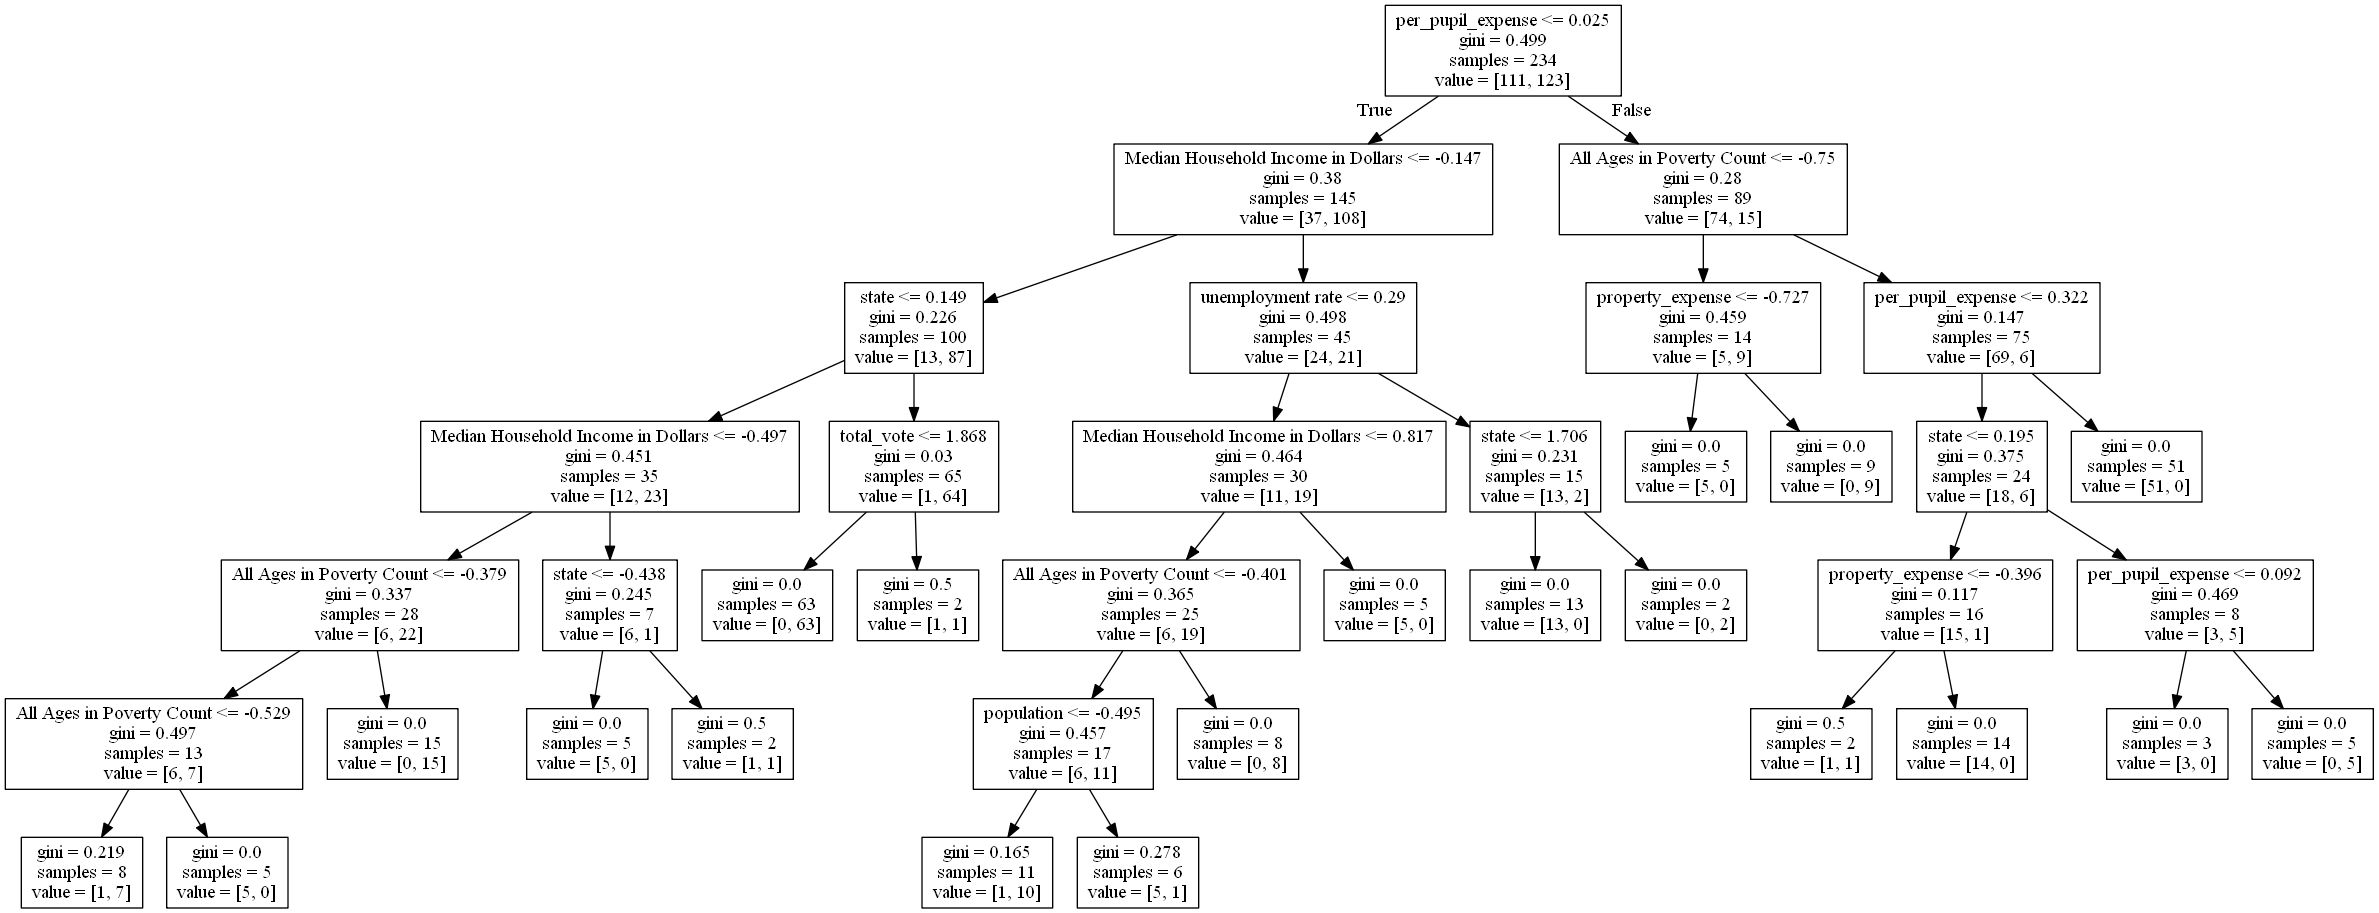

In [788]:
# show the png
Image(filename='dtree1.png', width=1000, height=1000) 

### Random forest classifier ###

#### Classificators creation

In [752]:
#Classificator initialisation
forest_clf_sfs = RandomForestClassifier(random_state = 0)
forest_clf_rfe = RandomForestClassifier(random_state = 0)
forest_clf_kbest = RandomForestClassifier(random_state = 0)
forest_clf_int = RandomForestClassifier(random_state = 0)

In [748]:
#Get list hyperparameters
forest_clf_sfs.get_params().keys()

dict_keys(['bootstrap', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [749]:
#Parameters and their values that'll be checked
parameters_forest_grid = {
  'criterion': ['entropy', 'gini'],
  'n_estimators': [5,10,15,20],
  'n_jobs': [2,3,4,5,6,7,8,9,10]
}

#### Grid search

In [753]:
#Grid search
grid_forest_sfs_cv = grid_search.GridSearchCV(forest_clf_sfs, parameters_forest_grid, scoring = 'accuracy', cv = cv_sfs )
grid_forest_rfe_cv = grid_search.GridSearchCV(forest_clf_rfe, parameters_forest_grid, scoring = 'accuracy', cv = cv_rfe )
grid_forest_kbest_cv = grid_search.GridSearchCV(forest_clf_kbest, parameters_forest_grid, scoring = 'accuracy', cv = cv_kbest )
grid_forest_int_cv = grid_search.GridSearchCV(forest_clf_int, parameters_forest_grid, scoring = 'accuracy', cv = cv_int )

#### Fit models

In [754]:
#Fit model
grid_forest_sfs_cv.fit(X_sfs_train, np.ravel(y_sfs_train))

GridSearchCV(cv=sklearn.cross_validation.KFold(n=234, n_folds=5, shuffle=False, random_state=7),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'criterion': ['entropy', 'gini'], 'n_estimators': [5, 10, 15, 20], 'n_jobs': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [755]:
grid_forest_rfe_cv.fit(X_rfe_train, np.ravel(y_rfe_train))

GridSearchCV(cv=sklearn.cross_validation.KFold(n=234, n_folds=5, shuffle=False, random_state=7),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'criterion': ['entropy', 'gini'], 'n_estimators': [5, 10, 15, 20], 'n_jobs': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [756]:
grid_forest_kbest_cv.fit(X_kbest_train, np.ravel(y_kbest_train))

GridSearchCV(cv=sklearn.cross_validation.KFold(n=234, n_folds=5, shuffle=False, random_state=7),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'criterion': ['entropy', 'gini'], 'n_estimators': [5, 10, 15, 20], 'n_jobs': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [757]:
grid_forest_int_cv.fit(X_int_train, np.ravel(y_int_train))

GridSearchCV(cv=sklearn.cross_validation.KFold(n=234, n_folds=5, shuffle=False, random_state=7),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'criterion': ['entropy', 'gini'], 'n_estimators': [5, 10, 15, 20], 'n_jobs': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

#### Getting best parameters

In [758]:
grid_forest_sfs_cv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [760]:
grid_forest_rfe_cv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [762]:
grid_forest_kbest_cv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [764]:
grid_forest_int_cv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

#### Fit models with "best" parameters and getting predictions

In [759]:
model_forest_sfs = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False).fit(X_sfs_train, np.ravel(y_sfs_train)) 
y_forest_sfs_pred = model_forest_sfs.predict(X_sfs_test)

In [761]:
model_forest_rfe = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False).fit(X_rfe_train, np.ravel(y_rfe_train)) 
y_forest_rfe_pred = model_forest_rfe.predict(X_rfe_test)

In [763]:
model_forest_kbest = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False).fit(X_kbest_train, np.ravel(y_kbest_train)) 
y_forest_kbest_pred = model_forest_kbest.predict(X_kbest_test)

In [765]:
model_forest_int = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False).fit(X_int_train, np.ravel(y_int_train)) 
y_forest_int_pred = model_forest_int.predict(X_int_test)

#### Random Forest Models Performance Evaluation

Accuracy and AUC for all models with different sets of features.

In [766]:
print("Random forest accuracy is : {}%".format(accuracy_score(y_sfs_test, y_forest_sfs_pred)*100))
print("Random forest AUC: {:.3f}".format(roc_auc_score(y_sfs_test, y_forest_sfs_pred)))

Random forest accuracy is : 100.0%
Random forest AUC: 1.000


In [767]:
print("Random forest accuracy is : {}%".format(accuracy_score(y_rfe_test, y_forest_rfe_pred)*100))
print("Random forest AUC: {:.3f}".format(roc_auc_score(y_rfe_test, y_forest_rfe_pred)))

Random forest accuracy is : 100.0%
Random forest AUC: 1.000


In [768]:
print("Random forest accuracy is : {}%".format(accuracy_score(y_kbest_test, y_forest_kbest_pred)*100))
print("Random forest AUC: {:.3f}".format(roc_auc_score(y_kbest_test, y_forest_kbest_pred)))

Random forest accuracy is : 100.0%
Random forest AUC: 1.000


In [769]:
print("Random forest accuracy is : {}%".format(accuracy_score(y_int_test, y_forest_int_pred)*100))
print("Random forest AUC: {:.3f}".format(roc_auc_score(y_int_test, y_forest_int_pred)))

Random forest accuracy is : 85.18518518518519%
Random forest AUC: 0.821


In [790]:
pd.DataFrame(
    confusion_matrix(y_int_test, y_forest_int_pred)
)

,0,1
0,7,3
1,1,16


## Naive Bayes Classifier

#### Classificators creation

In [771]:
clf_sfs = GaussianNB() # with default parameters
clf_rfe = GaussianNB()
clf_kbest = GaussianNB()
clf_int = GaussianNB()

#### Fit Models and getting predictions

In [774]:
#Train classification model
nbc_model_sfs = clf_sfs.fit(X_sfs_train, y_sfs_train)
#Apply model and get predictions
y_nbc_sfs_pred = nbc_model_sfs.predict(X_sfs_test)

In [775]:
#Train classification model
nbc_model_rfe = clf_rfe.fit(X_rfe_train, y_rfe_train)
#Apply model and get predictions
y_nbc_rfe_pred = nbc_model_rfe.predict(X_rfe_test)

In [776]:
#Train classification model
nbc_model_kbest = clf_kbest.fit(X_kbest_train, y_kbest_train)
#Apply model and get predictions
y_nbc_kbest_pred = nbc_model_kbest.predict(X_kbest_test)

In [777]:
#Train classification model
nbc_model_int = clf_int.fit(X_int_train, y_int_train)
#Apply model and get predictions
y_nbc_int_pred = nbc_model_int.predict(X_int_test)

#### Naive Bayes Model Performance Evaluation

Accuracy and AUC for all models with different sets of features.

In [778]:
print("Naive Bayes accuracy is : {}%".format(accuracy_score(y_sfs_test, y_nbc_sfs_pred)*100))
print("Naive Bayes AUC: {:.3f}".format(roc_auc_score(y_sfs_test, y_nbc_sfs_pred)))

Naive Bayes accuracy is : 100.0%
Naive Bayes AUC: 1.000


In [779]:
print("Naive Bayes accuracy is : {}%".format(accuracy_score(y_rfe_test, y_nbc_rfe_pred)*100))
print("Naive Bayes AUC: {:.3f}".format(roc_auc_score(y_rfe_test, y_nbc_rfe_pred)))

Naive Bayes accuracy is : 100.0%
Naive Bayes AUC: 1.000


In [780]:
print("Naive Bayes accuracy is : {}%".format(accuracy_score(y_kbest_test, y_nbc_kbest_pred)*100))
print("Naive Bayes AUC: {:.3f}".format(roc_auc_score(y_kbest_test, y_nbc_kbest_pred)))

Naive Bayes accuracy is : 100.0%
Naive Bayes AUC: 1.000


In [781]:
print("Naive Bayes accuracy is : {}%".format(accuracy_score(y_int_test, y_nbc_int_pred)*100))
print("Naive Bayes AUC: {:.3f}".format(roc_auc_score(y_int_test, y_nbc_int_pred)))

Naive Bayes accuracy is : 81.48148148148148%
Naive Bayes AUC: 0.750


In [792]:
#Confusion matrix for model with set of features, getting intuitevely
pd.DataFrame(
    confusion_matrix(y_int_test, y_nbc_int_pred)
)

,0,1
0,5,5
1,0,17


## SVM Classifier

In [794]:
#Classificator initialisation
svm_clf_sfs = svm.SVC(random_state = 0)
svm_clf_rfe = svm.SVC(random_state = 0)
svm_clf_kbest = svm.SVC(random_state = 0)
svm_clf_int = svm.SVC(random_state = 0)

In [795]:
#Parameters that will be checked
parameters_svm_grid = {
  'kernel': ['linear', 'rbf', 'sigmoid', 'poly'] ,
  'gamma': [0.0001, 0.001, 0.01, 0.1],
  'C' : [0.8, 0.9, 1.0],
}

#### Grid search

In [796]:
#Grid search
grid_svm_sfs_cv = grid_search.GridSearchCV(svm_clf_sfs, parameters_svm_grid, scoring = 'accuracy', cv = cv_sfs )
grid_svm_rfe_cv = grid_search.GridSearchCV(svm_clf_rfe, parameters_svm_grid, scoring = 'accuracy', cv = cv_rfe )
grid_svm_kbest_cv = grid_search.GridSearchCV(svm_clf_kbest, parameters_svm_grid, scoring = 'accuracy', cv = cv_kbest )
grid_svm_int_cv = grid_search.GridSearchCV(svm_clf_int, parameters_svm_grid, scoring = 'accuracy', cv = cv_int )

#### Fit models

In [797]:
#Fit model
grid_svm_sfs_cv.fit(X_sfs_train, np.ravel(y_sfs_train))

GridSearchCV(cv=sklearn.cross_validation.KFold(n=234, n_folds=5, shuffle=False, random_state=7),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'kernel': ['linear', 'rbf', 'sigmoid', 'poly'], 'gamma': [0.0001, 0.001, 0.01, 0.1], 'C': [0.8, 0.9, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [798]:
#Fit model
grid_svm_rfe_cv.fit(X_rfe_train, np.ravel(y_rfe_train))

GridSearchCV(cv=sklearn.cross_validation.KFold(n=234, n_folds=5, shuffle=False, random_state=7),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'kernel': ['linear', 'rbf', 'sigmoid', 'poly'], 'gamma': [0.0001, 0.001, 0.01, 0.1], 'C': [0.8, 0.9, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [799]:
#Fit model
grid_svm_kbest_cv.fit(X_kbest_train, np.ravel(y_kbest_train))

GridSearchCV(cv=sklearn.cross_validation.KFold(n=234, n_folds=5, shuffle=False, random_state=7),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'kernel': ['linear', 'rbf', 'sigmoid', 'poly'], 'gamma': [0.0001, 0.001, 0.01, 0.1], 'C': [0.8, 0.9, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [800]:
#Fit model
grid_svm_int_cv.fit(X_int_train, np.ravel(y_int_train))

GridSearchCV(cv=sklearn.cross_validation.KFold(n=234, n_folds=5, shuffle=False, random_state=7),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'kernel': ['linear', 'rbf', 'sigmoid', 'poly'], 'gamma': [0.0001, 0.001, 0.01, 0.1], 'C': [0.8, 0.9, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

#### Getting best parameters

In [801]:
grid_svm_sfs_cv.best_estimator_

SVC(C=0.8, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [802]:
grid_svm_rfe_cv.best_estimator_

SVC(C=0.8, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [803]:
grid_svm_kbest_cv.best_estimator_

SVC(C=0.8, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [804]:
grid_svm_int_cv.best_estimator_

SVC(C=0.8, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

#### Fit models with "best" parameters and getting predictions

In [805]:
model_svm_sfs = svm.SVC(C=0.8, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False).fit(X_sfs_train, np.ravel(y_sfs_train)) 
y_svm_sfs_pred = model_svm_sfs.predict(X_sfs_test)

In [806]:
model_svm_rfe = svm.SVC(C=0.8, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False).fit(X_rfe_train, np.ravel(y_rfe_train)) 
y_svm_rfe_pred = model_svm_rfe.predict(X_rfe_test)

In [807]:
model_svm_kbest = svm.SVC(C=0.8, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False).fit(X_kbest_train, np.ravel(y_kbest_train)) 
y_svm_kbest_pred = model_svm_kbest.predict(X_kbest_test)

In [808]:
model_svm_int = svm.SVC(C=0.8, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False).fit(X_int_train, np.ravel(y_int_train)) 
y_svm_int_pred = model_svm_int.predict(X_int_test)

#### SVM Models Performance Evaluation

Accuracy and AUC for all models with different sets of features.

In [809]:
print("SVM accuracy is : {}%".format(accuracy_score(y_sfs_test, y_svm_sfs_pred)*100))
print("SVM AUC: {:.3f}".format(roc_auc_score(y_sfs_test, y_svm_sfs_pred)))

SVM accuracy is : 100.0%
SVM AUC: 1.000


In [812]:
print("SVM accuracy is : {}%".format(accuracy_score(y_rfe_test, y_svm_rfe_pred)*100))
print("SVM AUC: {:.3f}".format(roc_auc_score(y_rfe_test, y_svm_rfe_pred)))

SVM accuracy is : 100.0%
SVM AUC: 1.000


In [813]:
print("SVM accuracy is : {}%".format(accuracy_score(y_kbest_test, y_svm_kbest_pred)*100))
print("SVM AUC: {:.3f}".format(roc_auc_score(y_kbest_test, y_svm_kbest_pred)))

SVM accuracy is : 100.0%
SVM AUC: 1.000


In [814]:
print("SVM accuracy is : {}%".format(accuracy_score(y_int_test, y_svm_int_pred)*100))
print("SVM AUC: {:.3f}".format(roc_auc_score(y_int_test, y_svm_int_pred)))

SVM accuracy is : 92.5925925925926%
SVM AUC: 0.921


In [815]:
#Confusion matrix for model with set of features, getting intuitevely
pd.DataFrame(
    confusion_matrix(y_int_test, y_svm_int_pred)
)

,0,1
0,9,1
1,1,16


## SUMMARY

1. All models that use features choosen by algorithms, show accuracy = 100% and AUC = 1.0. 

It means that models are overfitted. It could be fixed, probably, with using less amount of features (now it's 10 best features).

2. With features that were choosen intuitevely, models show following results:


* Decision Tree Classifier: Accuracy is : 77.77777777777779%,  AUC is: 0.782


* Naive Bayes Classifier: Accuracy is : 81.48148148148148%,  AUC is: 0.750


* Random Forest Classifier: Accuracy is : 85.18518518518519%,  AUC is: 0.82

* SVM Classifier: Accuracy is : 92.5925925925926%,  AUC is: 0.921

So, SVM Classifier shows the best result. 

Parameters that were used:

   - kernel ='linear',

   - C=0.8,

   - gamma = 0.0001.


3. Next steps for getting better results:
    - work on SVM Classification model;
    - try to find better set of features;
    - try to find better set of model hyperparameters.